In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('nifty.csv')

In [3]:
df.head()

,Date,Close
0,2007-09-17,4494.649902
1,2007-09-18,4546.200195
2,2007-09-19,4732.350098
3,2007-09-20,4747.549805
4,2007-09-21,4837.549805


In [4]:
df.set_index('Date', inplace=True)

In [5]:
df.head()

,Close
Date,
2007-09-17,4494.649902
2007-09-18,4546.200195
2007-09-19,4732.350098
2007-09-20,4747.549805
2007-09-21,4837.549805


In [6]:
df.describe()

,Close
count,3169.000000
mean,7269.978483
std,2472.654821
min,2524.199951
25%,5275.149902
50%,6299.149902
75%,9119.400391
max,12362.299810


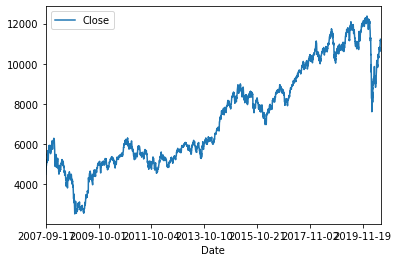

In [7]:
df.plot()

In [8]:
#test seasonality using dickeyfuller test
from statsmodels.tsa.stattools import adfuller

In [9]:
test_result=adfuller(df['Close'])

In [10]:
#H0= Data is non-stationary
#H1= Data is sationary
def adfuller_test(close):
    result= adfuller(close)
    labels=['ADF Test Statistics','p-value','#Lags used','Number of Observations used']
    for value,label in zip(result,labels): #zip nwans combining values
        print(label+':'+str(value))
    if result[1]<=0.05:
        print("Strong evidence against null hypothesis HO, reject the null hypothesis. Data has seasonality")
    else:
        print("Weak evidence against null hypothesis HO, cannot reject the null hypothesis. Data has no seasonality")
        

In [11]:
adfuller_test(df['Close'])

ADF Test Statistics:-0.7724314192567794
p-value:0.8270863188615654
#Lags used:12
Number of Observations used:3156
Weak evidence against null hypothesis HO, cannot reject the null hypothesis. Data has no seasonality


In [14]:
#Differencing
df['Close Difference'] = df['Close']-df["Close"].shift(1)

In [15]:
df.head()

,Close,Sales First Difference,Close Difference
Date,,,
2007-09-17,4494.649902,NaN,NaN
2007-09-18,4546.200195,51.550293,51.550293
2007-09-19,4732.350098,186.149903,186.149903
2007-09-20,4747.549805,15.199707,15.199707
2007-09-21,4837.549805,90.000000,90.000000


In [16]:
adfuller_test(df['Close Difference'].dropna())

ADF Test Statistics:-14.918216324763963
p-value:1.4245450717048715e-27
#Lags used:11
Number of Observations used:3156
Strong evidence against null hypothesis HO, reject the null hypothesis. Data has seasonality


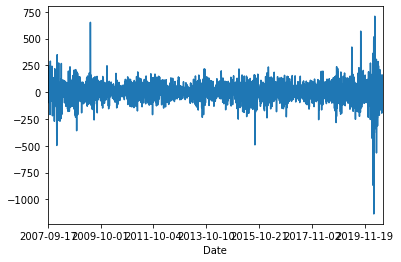

In [17]:
df['Close Difference'].plot()

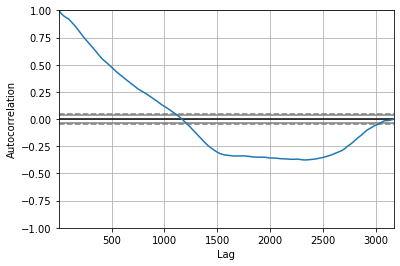

In [21]:
#AutoRegressive Model
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close'])
plt.show()

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

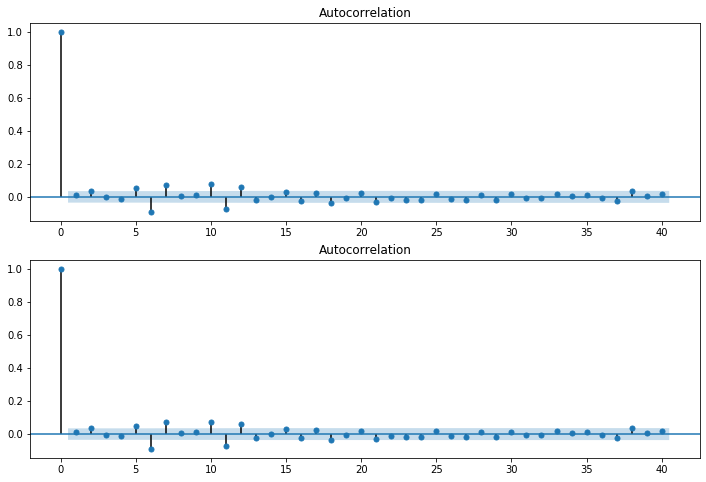

In [22]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['Close Difference'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_acf(df['Close Difference'].iloc[13:],lags=40,ax=ax2)

In [23]:
#For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [25]:
model=ARIMA(df['Close'],order=(1,1,1))
model_fit= model.fit()

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 3168
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -18762.874
Method:                       css-mle   S.D. of innovations             90.349
Date:                Sun, 27 Sep 2020   AIC                          37533.749
Time:                        19:54:59   BIC                          37557.992
Sample:                             1   HQIC                         37542.445
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.1566      1.823      1.183      0.237      -1.416       5.729
ar.L1.D.Close     0.8802      0.090      9.833      0.000       0.705       1.056
ma.L1.D.Close    -0.8639      0.095     -9.125      0.000      -1.049      -0.678
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1361           +0.0000j            1.1361            0.0000
MA.1            1.1575           +0.0000j            1.1575            0.0000
-----------------------------------------------------------------------------
"""

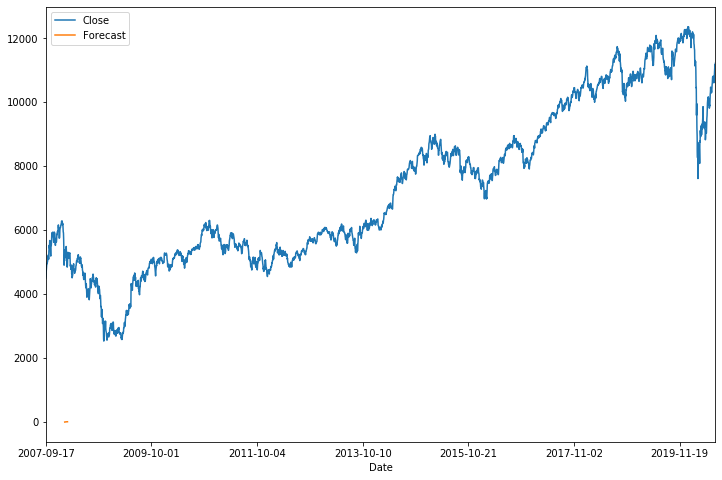

In [27]:
df['Forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Close','Forecast']].plot(figsize=(12,8))

In [28]:
model=sm.tsa.statespace.SARIMAX(df['Close'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


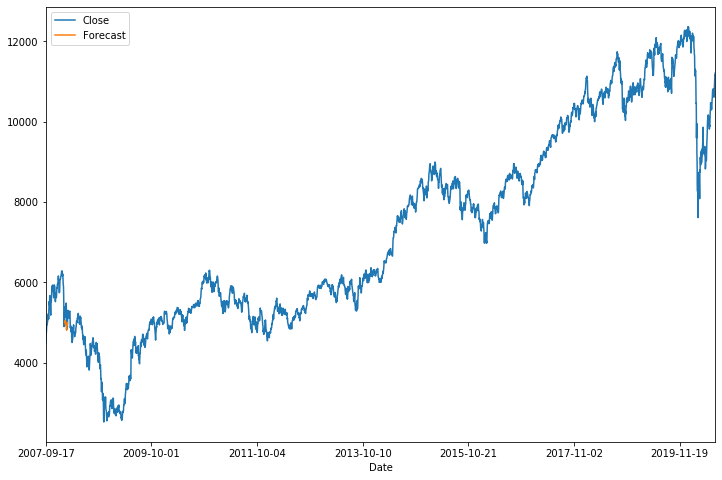

In [29]:
df['Forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Close','Forecast']].plot(figsize=(12,8))